In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_rent = pd.read_csv('datasets/dataset_aluguel.csv')
df_rent.head()

,id,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,1,106.181018,1,36.760806,0,True,False,1767.122088
1,2,192.607146,4,10.453581,1,True,False,3278.742397
2,3,159.799091,5,27.072399,1,True,False,2953.899737
3,4,139.798773,4,34.789220,1,False,True,2514.717108
4,5,73.402796,5,11.427501,0,False,True,1942.164396


In [3]:
df_rent.info()

<class 'pandas.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


In [4]:
# Remover coluna Id
df_rent.drop(columns=['id'], inplace=True)
df_rent.head()

,tamanho_m2,n_quartos,idade_casa,garagem,localizacao_Periferia,localizacao_Subúrbio,valor_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396


In [5]:
df_rent.columns = ['area', 'rooms', 'house_age', 'has_garage', 'is_outskirts', 'loc_outskirts', 'value']
df_rent.head()

,area,rooms,house_age,has_garage,is_outskirts,loc_outskirts,value
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396


In [7]:
df_rent['has_garage'] = df_rent['has_garage'] == 1
df_rent.head()

,area,rooms,house_age,has_garage,is_outskirts,loc_outskirts,value
0,106.181018,1,36.760806,False,True,False,1767.122088
1,192.607146,4,10.453581,True,True,False,3278.742397
2,159.799091,5,27.072399,True,True,False,2953.899737
3,139.798773,4,34.789220,True,False,True,2514.717108
4,73.402796,5,11.427501,False,False,True,1942.164396


In [8]:
# Copiar DF para DF EDA
df_rent_eda = df_rent.copy()
df_rent_eda.head()

,area,rooms,house_age,has_garage,is_outskirts,loc_outskirts,value
0,106.181018,1,36.760806,False,True,False,1767.122088
1,192.607146,4,10.453581,True,True,False,3278.742397
2,159.799091,5,27.072399,True,True,False,2953.899737
3,139.798773,4,34.789220,True,False,True,2514.717108
4,73.402796,5,11.427501,False,False,True,1942.164396


## EDA

In [9]:
df_rent_eda.describe()

,area,rooms,house_age,value
count,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,2112.819084
std,44.623412,1.400541,14.348628,514.314100
min,50.828318,1.000000,0.259243,1192.728727
25%,78.980114,1.750000,13.969405,1694.633091
50%,119.621368,3.000000,24.827177,2069.395680
75%,159.530468,4.000000,37.252879,2520.182679
max,198.033040,5.000000,49.812685,3278.742397


In [10]:
df_rent_eda.isnull().sum()

area             0
rooms            0
house_age        0
has_garage       0
is_outskirts     0
loc_outskirts    0
value            0
dtype: int64

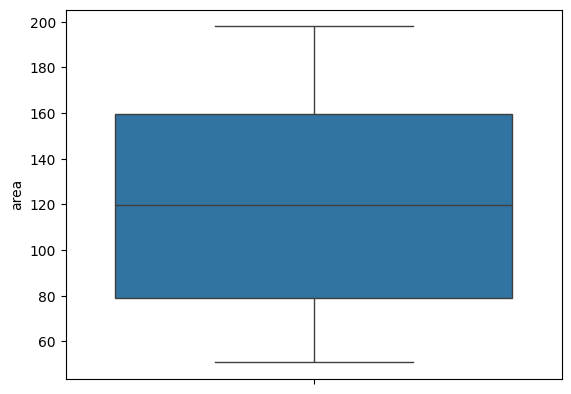

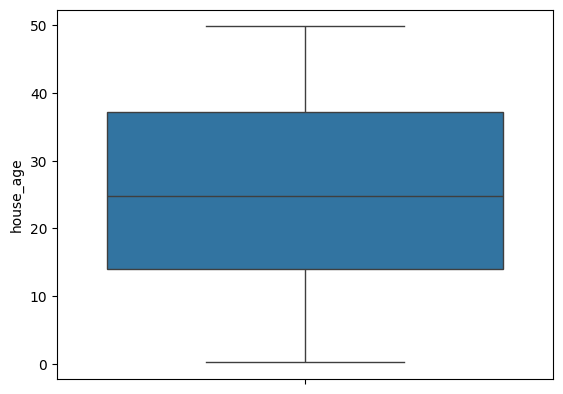

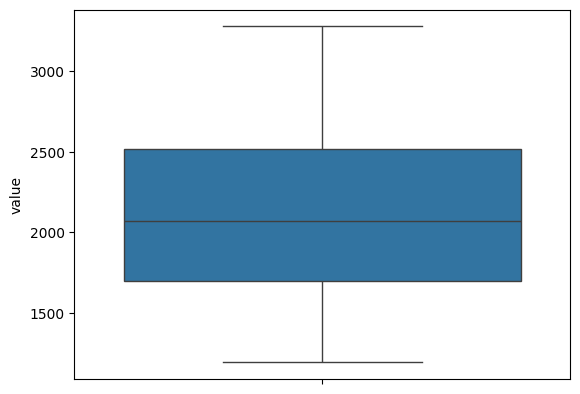

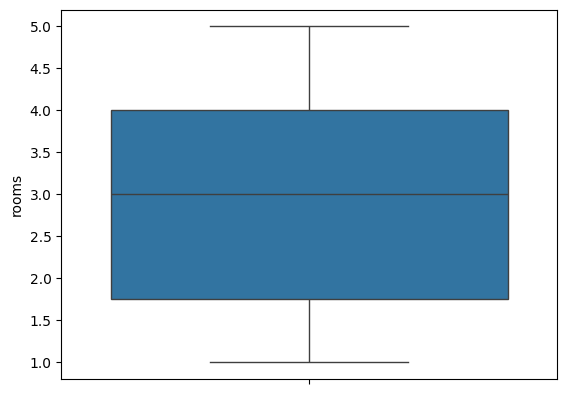

In [15]:
# Detectar outliers
sns.boxplot(y='area', data=df_rent_eda)
plt.show()
sns.boxplot(y='house_age', data=df_rent_eda)
plt.show()
sns.boxplot(y='value', data=df_rent_eda)
plt.show()
sns.boxplot(y='rooms', data=df_rent_eda)
plt.show()

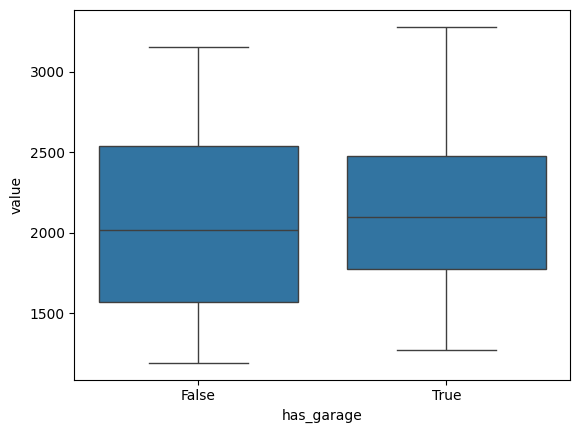

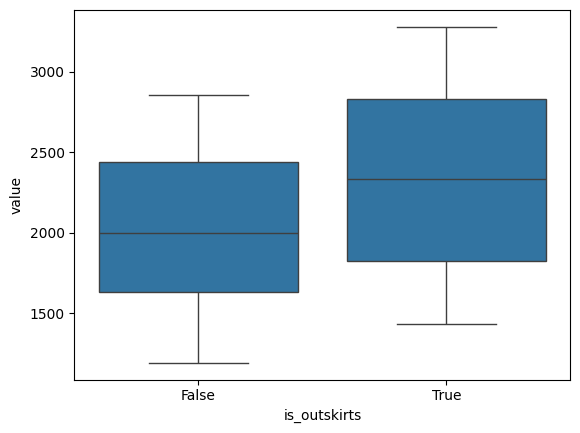

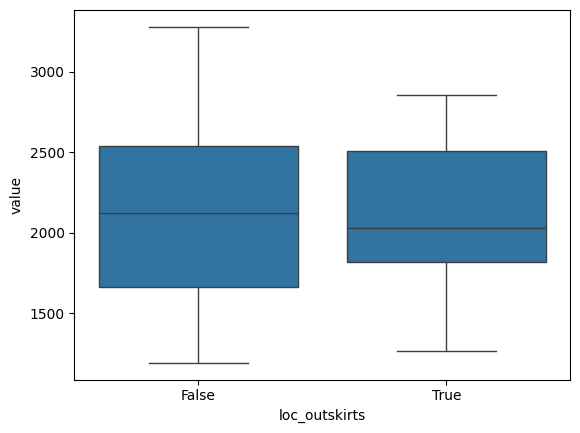

In [16]:
# Cruzamento de Variáveis Categóricas com Nível de Colesterol
sns.boxplot(x='has_garage', y='value', data=df_rent_eda)
plt.show()
sns.boxplot(x='is_outskirts', y='value', data=df_rent_eda)
plt.show()
sns.boxplot(x='loc_outskirts', y='value', data=df_rent_eda)
plt.show()

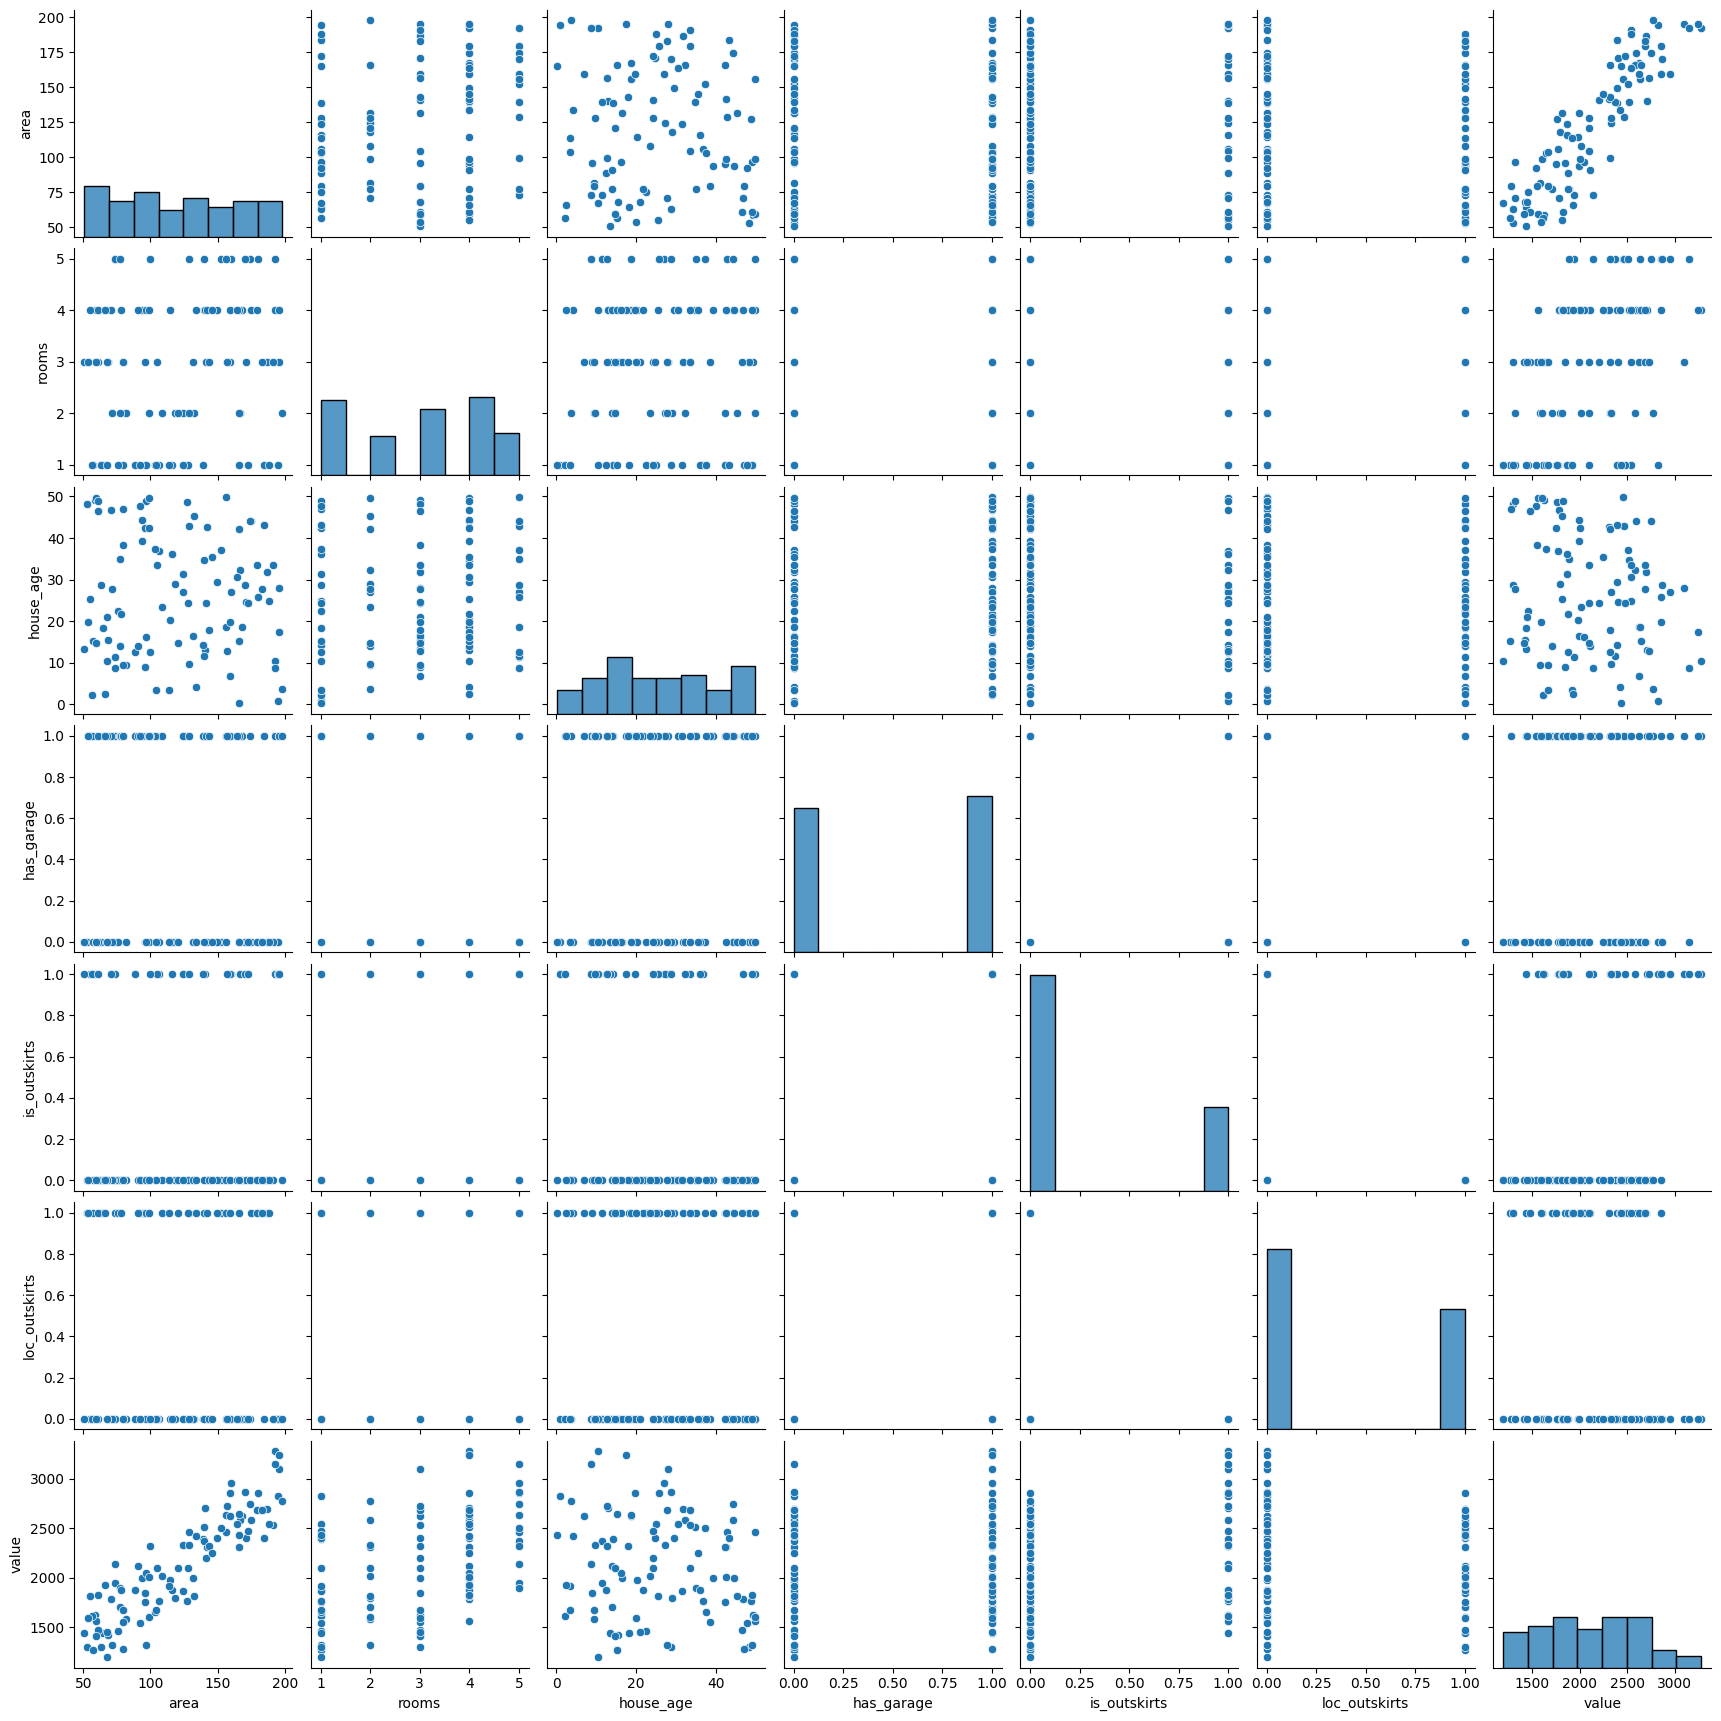

In [17]:
sns.pairplot(df_rent_eda)
plt.show()

In [18]:
# Converter variáveis categóricas nominais para numéricas, usando OneHotEncoder do Pandas
df_rent_eda = pd.get_dummies(df_rent_eda, columns=['has_garage', 'is_outskirts', 'loc_outskirts'], dtype=int)
df_rent_eda.head()

,area,rooms,house_age,value,has_garage_False,has_garage_True,is_outskirts_False,is_outskirts_True,loc_outskirts_False,loc_outskirts_True
0,106.181018,1,36.760806,1767.122088,1,0,0,1,1,0
1,192.607146,4,10.453581,3278.742397,0,1,0,1,1,0
2,159.799091,5,27.072399,2953.899737,0,1,0,1,1,0
3,139.798773,4,34.789220,2514.717108,0,1,1,0,0,1
4,73.402796,5,11.427501,1942.164396,1,0,1,0,0,1


<Axes: >

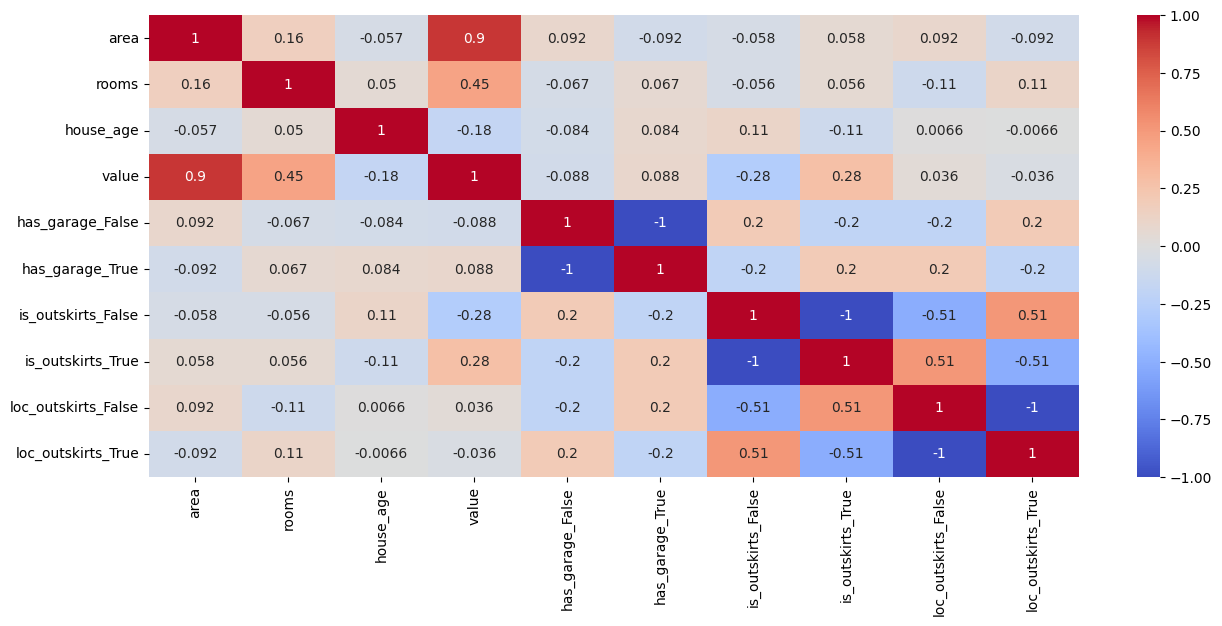

In [19]:
plt.figure(figsize=(15, 6))
sns.heatmap(df_rent_eda.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

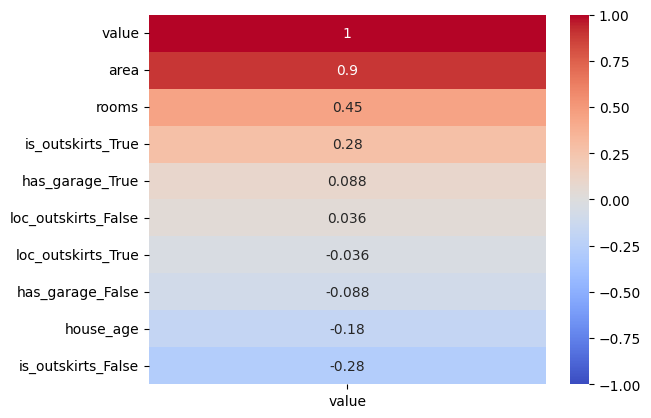

In [20]:
sns.heatmap(df_rent_eda.corr()[['value']].sort_values(by='value', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

## Bucketing

In [21]:
df_rent_bucketing = df_rent.copy()
df_rent_bucketing.head()

,area,rooms,house_age,has_garage,is_outskirts,loc_outskirts,value
0,106.181018,1,36.760806,False,True,False,1767.122088
1,192.607146,4,10.453581,True,True,False,3278.742397
2,159.799091,5,27.072399,True,True,False,2953.899737
3,139.798773,4,34.789220,True,False,True,2514.717108
4,73.402796,5,11.427501,False,False,True,1942.164396


In [22]:
df_rent_bucketing.describe()

,area,rooms,house_age,value
count,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,2112.819084
std,44.623412,1.400541,14.348628,514.314100
min,50.828318,1.000000,0.259243,1192.728727
25%,78.980114,1.750000,13.969405,1694.633091
50%,119.621368,3.000000,24.827177,2069.395680
75%,159.530468,4.000000,37.252879,2520.182679
max,198.033040,5.000000,49.812685,3278.742397


In [23]:
# Bucketing house_age
bins_house_age = [0, 10, 20, 30, 40, 50]
labels_house_age = ['0-10', '10-20', '20-30', '30-40', '40-50']
df_rent_bucketing['house_age_bucketing'] = pd.cut(x=df_rent_bucketing['house_age'], bins=bins_house_age, labels=labels_house_age, include_lowest=True)
df_rent_bucketing.head()

,area,rooms,house_age,has_garage,is_outskirts,loc_outskirts,value,house_age_bucketing
0,106.181018,1,36.760806,False,True,False,1767.122088,30-40
1,192.607146,4,10.453581,True,True,False,3278.742397,10-20
2,159.799091,5,27.072399,True,True,False,2953.899737,20-30
3,139.798773,4,34.789220,True,False,True,2514.717108,30-40
4,73.402796,5,11.427501,False,False,True,1942.164396,10-20


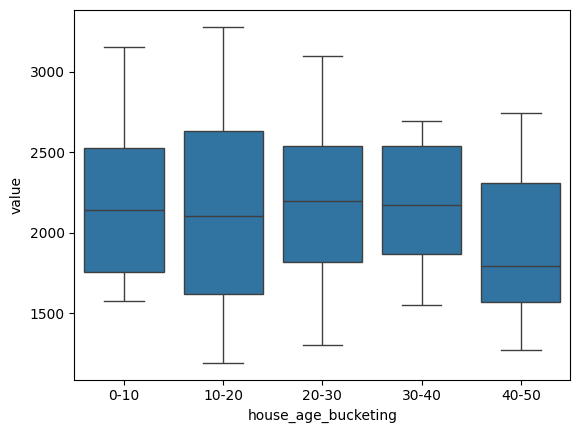

In [24]:
sns.boxplot(x='house_age_bucketing', y='value', data=df_rent_bucketing)
plt.show()


In [25]:
# Bucketing area
bins_area = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
labels_area = ['0-20', '20-40', '40-60', '60-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200']
df_rent_bucketing['area_bucketing'] = pd.cut(x=df_rent_bucketing['area'], bins=bins_area, labels=labels_area, include_lowest=True)
df_rent_bucketing.head()


,area,rooms,house_age,has_garage,is_outskirts,loc_outskirts,value,house_age_bucketing,area_bucketing
0,106.181018,1,36.760806,False,True,False,1767.122088,30-40,100-120
1,192.607146,4,10.453581,True,True,False,3278.742397,10-20,180-200
2,159.799091,5,27.072399,True,True,False,2953.899737,20-30,140-160
3,139.798773,4,34.789220,True,False,True,2514.717108,30-40,120-140
4,73.402796,5,11.427501,False,False,True,1942.164396,10-20,60-80


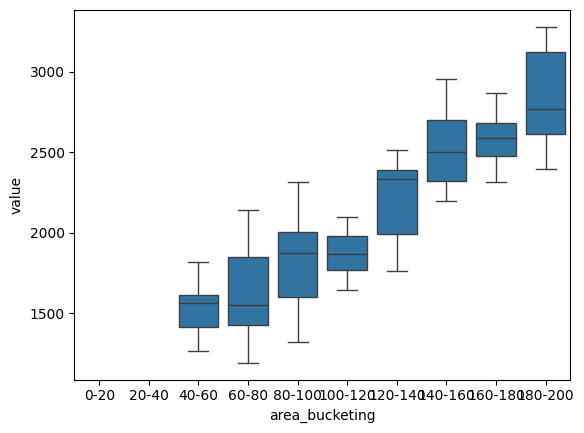

In [27]:
sns.boxplot(x='area_bucketing', y='value', data=df_rent_bucketing)
plt.show()

## Treinar o Modelo

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
X = df_rent_bucketing.drop(columns='value')
y = df_rent_bucketing['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Pipeline
# Padronizar variáveis numéricas
# OneHotEncoder nas variáveis categóricas nominais
# OrdinalEncoder nas variáveis categóricas ordinais

# Nome das Colunas
colunas_categoricas = ['has_garage', 'is_outskirts', 'loc_outskirts']
colunas_numericas = ['rooms', 'house_age', 'area']

In [32]:
# Transformer Categoricas
transformer_categoricas = Pipeline(
    steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [33]:
# Transformer Numéricas
transformer_numericas = Pipeline(
    steps=[
        ('scaler', StandardScaler())
    ]
)

In [34]:
# Criar um Column Transformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('categoricas', transformer_categoricas, colunas_categoricas),
        ('numericas', transformer_numericas, colunas_numericas)
    ]
)

In [35]:
# Pipeline principal
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]
)

In [36]:
# Treinar modelo
model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('categoricas', ...), ('numericas', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the differe

## Validação do Modelo - Análise de Métricas

In [37]:
# Gerar a predição
y_pred = model.predict(X_test)
y_pred

array([1336.69671294, 2410.99826887, 2670.24679485, 2443.6325764 ,
       1885.13812104, 1905.89723372, 1994.07772353, 2727.02755763,
       1298.86714595, 1804.29407254, 1965.22075629, 2260.84894852,
       2520.62465936, 3185.57416343, 1542.70953487, 1861.33055125,
       2329.18683073, 1386.83041729, 2634.92895123, 1437.93648614,
       2554.75620366, 2689.6774884 , 1350.92870953, 1789.96793897,
       2820.35037033, 1948.67451451, 1421.70111718, 2392.92535255,
       2499.14990476, 1550.65971438])

In [38]:
# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 41.817964290572164
MSE: 2646.4163244973
R2: 0.9898441578705868


In [39]:
# Calcular RMSE
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 51.44333119557189


## Análise de Resíduos

In [40]:
# Calcular resíduos
residuos = y_test - y_pred
residuos

83     76.391104
53    -14.713548
70    -30.289988
45    -47.443330
44    -10.534414
39    -36.575832
22      1.594314
80    -45.079032
10     -4.495444
0     -37.171984
18     12.775731
30    -62.046129
73    -45.040236
33    -31.574329
90    -97.984763
4      80.833844
76    -16.246797
77     85.540894
12    -47.835110
31     17.928024
55    -16.804220
88     -2.790361
26    -77.726257
42     27.294305
69    -49.271444
15    -59.366638
40     -0.113585
96    -60.775618
9     -42.611616
72   -115.690039
Name: value, dtype: float64

In [41]:
# Transformar resíduos na escala padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)
residuos_std

array([ 2.1013763 ,  0.14888739, -0.18493558, -0.55255358,  0.23845158,
       -0.31964923,  0.49838569, -0.50188365,  0.3678744 , -0.33242554,
        0.73801771, -0.86551019, -0.50105222, -0.21246066, -1.63572096,
        2.19658989,  0.11602791,  2.29746796, -0.56094992,  0.84843793,
        0.10408164,  0.4044165 , -1.20155533,  1.04916927, -0.59173239,
       -0.80808528,  0.46178324, -0.83828152, -0.44900378, -2.01516761])

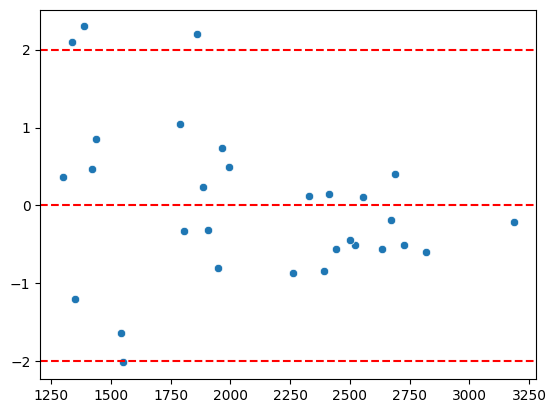

In [42]:
# Verificar linearidade dos resíduos: Valores devem estar entre -2 e 2
# Verificar homocedasticidade: Valores em torno da reta
sns.scatterplot(x=y_pred, y=residuos_std)
plt.axhline(y=0, color='r', linestyle='--')
plt.axhline(y=2, color='r', linestyle='--')
plt.axhline(y=-2, color='r', linestyle='--')
plt.show()

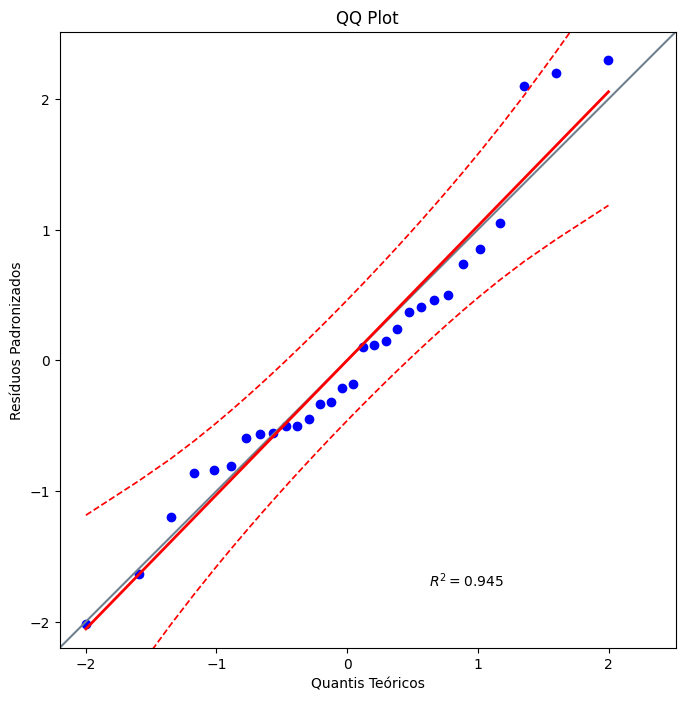

In [43]:
# Testar normalidade dos resíduos
# QQ Plot
import pingouin as pg
plt.figure(figsize=(14, 8))
pg.qqplot(residuos_std, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Padronizados')
plt.title('QQ Plot')
plt.show()

In [44]:
# Testes de Normalidade
from scipy.stats import shapiro, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt

In [45]:
# Teste de Shapiro-Wilk
# H0: A amostra provém de uma população normal
# H1: A amostra não provém de uma população normal
stat_shapiro, p_shapiro = shapiro(residuos)
print(f'Estatística Shapiro-Wilk: {stat_shapiro}')
print(f'p-valor Shapiro-Wilk: {p_shapiro}')


Estatística Shapiro-Wilk: 0.947286774836929
p-valor Shapiro-Wilk: 0.14295190521737922


P Valor acima de 0.05, aceita hipótese nula, amostra tem distribuição normal

In [46]:
# Teste de Kolmogorov-Smirnov
stat_kstest, p_kstest = kstest(residuos, 'norm')
print(f'Estatística Kolmogorov-Smirnov: {stat_kstest}')
print(f'p-valor Kolmogorov-Smirnov: {p_kstest}')

Estatística Kolmogorov-Smirnov: 0.7307008684285924
p-valor Kolmogorov-Smirnov: 7.114239489470981e-17


P Valor abaixo de 0.05, rejeita hipótese nula, amostra não tem distribuição normal

In [47]:
# Teste de Lilliefors
stat_lilliefors, p_lilliefors = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f'Estatística Lilliefors: {stat_lilliefors}')
print(f'p-valor Lilliefors: {p_lilliefors}')

Estatística Lilliefors: 0.11206381273049248
p-valor Lilliefors: 0.433681186013138


P Valor acima de 0.05, aceita hipótese nula, amostra tem distribuição normal

In [48]:
# Teste de Anderson-Darling
# Se estatística for maior que o valor crítico, rejeita hipótese nula, amostra não tem distribuição normal
# Estamos interessados na posição 2 do array critical_anderson pois é o valor crítico para um nível de significância de 5% = 0.05
stat_anderson, critical_anderson, significance_anderson = anderson(residuos, dist='norm')
print(f'Estatística Anderson-Darling: {stat_anderson}')
print(f'Valor Crítico Anderson-Darling: {critical_anderson[2]}')
print(f'Significância Anderson-Darling: {significance_anderson[2]}')


Estatística Anderson-Darling: 0.5955793145650397
Valor Crítico Anderson-Darling: 0.732
Significância Anderson-Darling: 5.0


C:\Users\lucas\AppData\Local\Temp\ipykernel_28116\3564272478.py:4: FutureWarning: As of SciPy 1.17, users must choose a p-value calculation method by providing the `method` parameter. `method='interpolate'` interpolates the p-value from pre-calculated tables; `method` may also be an instance of `MonteCarloMethod` to approximate the p-value via Monte Carlo simulation. When `method` is specified, the result object will include a `pvalue` attribute and not attributes `critical_value`, `significance_level`, or `fit_result`. Beginning in 1.19.0, these other attributes will no longer be available, and a p-value will always be computed according to one of the available `method` options.
  stat_anderson, critical_anderson, significance_anderson = anderson(residuos, dist='norm')


Como o valor crítico foi maior que a estatística, aceita-se a hipótese nula

In [49]:
# Teste de Homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(
    steps=[
        ('preprocessor', preprocessor)
    ]
)
X_test_transformed = pipe.fit_transform(X_test)
X_test_transformed


array([[ 1.        ,  0.        ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.09633661, -0.95988726, -1.21821255],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  1.        ,
         0.        , -1.34871254,  1.17495594,  1.26476747],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.81886119, -0.92083471,  0.89861632],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.81886119,  0.14559369,  0.57087796],
       [ 0.        ,  1.        ,  0.        ,  1.        ,  1.        ,
         0.        , -1.34871254, -1.12811765, -0.63509035],
       [ 1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        , -1.34871254,  0.6374609 , -0.09333512],
       [ 0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.81886119,  0.87913961, -0.53543091],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0

In [50]:
test_goldfeldquandt = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeldquandt = test_goldfeldquandt[0]
p_goldfeldquandt = test_goldfeldquandt[1]
print(f'Estatística Goldfeld-Quandt: {stat_goldfeldquandt}')
print(f'p-valor Goldfeld-Quandt: {p_goldfeldquandt}')

Estatística Goldfeld-Quandt: 1.7842545621856194
p-valor Goldfeld-Quandt: 0.2152199125002291


P Valor acima de 0.05, há homogeneidade nas variáveis de teste em relação aos resíduos

## Realizar predições

In [51]:
predicao_individual = {
    'area': 200,
    'rooms': 3,
    'house_age': 50,
    'has_garage': True,
    'is_outskirts': False,
    'loc_outskirts': False
}
predicao_individual = pd.DataFrame(predicao_individual, index=[1])
predicao_individual

,area,rooms,house_age,has_garage,is_outskirts,loc_outskirts
1,200,3,50,True,False,False


In [52]:
model.predict(predicao_individual)

array([2607.88953238])

In [53]:
import joblib

In [55]:
# Salvar modelo
joblib.dump(model, 'rent_model.pkl')

['rent_model.pkl']